# **Sleep Quality Data EDA**
The motive of this EDA is to study about the Sleep quality data taken from kaggle: https://www.kaggle.com/datasets/imaginativecoder/sleep-health-data-sampled. 

#### The details of the following data as per **kaggle**:

#### Dataset Overview:
The Sleep Health and Lifestyle Dataset comprises 15000 rows and 13 columns, covering a wide range of variables related to sleep and daily habits. It includes details such as gender, age, occupation, sleep duration, quality of sleep, physical activity level, stress levels, BMI category, blood pressure, heart rate, daily steps, and the presence or absence of sleep disorders.

#### Key Features of the Dataset:
Comprehensive Sleep Metrics: Explore sleep duration, quality, and factors influencing sleep patterns.
Lifestyle Factors: Analyze physical activity levels, stress levels, and BMI categories.
Cardiovascular Health: Examine blood pressure and heart rate measurements.
Sleep Disorder Analysis: Identify the occurrence of sleep disorders such as Insomnia and Sleep Apnea.

#### Dataset Columns:

1. **Person ID**: A unique identifier for each individual.

2. **Gender**: The gender of the person (Male/Female).

3. **Age**: The age of the person in years.

4. **Occupation**: The occupation or profession of the person.

5. **Sleep Duration (hours)**: The number of hours the person sleeps per day.

6. **Quality of Sleep (scale: 1–10)**: A subjective rating of the quality of sleep, ranging from 1 (very poor) to 10 (excellent).

7. **Physical Activity Level (minutes/day)**: The number of minutes the person engages in physical activity daily.

8. **Stress Level (scale: 1–10)**: A subjective rating of the stress level experienced by the person, ranging from 1 (low stress) to 10 (high stress).

9. **BMI Category**: The BMI category of the person (e.g., Underweight, Normal, Overweight).

10. **Blood Pressure (systolic/diastolic)**: The blood pressure measurement of the person, represented as systolic pressure over diastolic pressure.

11. **Heart Rate (bpm)**: The resting heart rate of the person measured in beats per minute.

12. **Daily Steps**: The number of steps the person takes per day.

13. **Sleep Disorder**: The presence or absence of a sleep disorder in the person (Healthy, Insomnia, Sleep Apnea).


#### Details about Sleep Disorder Column:

1. **Healthy**: The individual does not exhibit any specific sleep disorder.

2. **Insomnia**: The individual experiences difficulty falling asleep or staying asleep, leading to inadequate or poor-quality sleep.

3. **Sleep Apnea**: The individual suffers from pauses in breathing during sleep, resulting in disrupted sleep patterns and potential health risks.
----

## **The content of this EDA:**
- Exploring the overall data
    - Number of Columns
    - Null or duplicate values
    - Types of columns
        - categorical columns
        - numerical columns
        - target column

- Categorical Columns
    - segregating further
        - Binary
        - Singleton
        - multilabel (<=20 classes)
        - multilabel (>20 classes)
    - distribution of values using pie/bar chart

- Numerical columns
    - segregating further
        - continuous
        - discrete
    - looking for outliers in discrete values
    - understanding the distribution on continuous values

- understanding realtionships between columns (if any)
----

## Exploring the overall data set

In [82]:
# importing the neceassary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [83]:
df = pd.read_csv("../raw_data/sleep_Data_Sampled.csv")
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,35,Doctor,6.65,7,50,7,Normal Weight,120/80,71,7100,Healthy
1,2,Male,42,Teacher,6.90,8,52,4,Normal,135/90,66,7000,Healthy
2,3,Male,34,Software Engineer,6.95,7,66,6,Overweight,126/83,74,6100,Healthy
3,4,Male,32,Doctor,6.90,6,52,7,Normal,120/80,71,6500,Healthy
4,5,Male,37,Lawyer,6.85,7,60,6,Normal,125/80,71,6500,Healthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14996,Female,59,Nurse,8.10,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
14996,14997,Female,59,Nurse,8.00,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
14997,14998,Female,59,Nurse,8.10,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
14998,14999,Female,59,Nurse,8.10,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


## Number of columns and their data types

In [84]:
n_col = len(df.columns)
print(f"There are {n_col} columns in the data set.\n")
print(df.info())

There are 13 columns in the data set.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                15000 non-null  int64  
 1   Gender                   15000 non-null  object 
 2   Age                      15000 non-null  int64  
 3   Occupation               15000 non-null  object 
 4   Sleep Duration           15000 non-null  float64
 5   Quality of Sleep         15000 non-null  int64  
 6   Physical Activity Level  15000 non-null  int64  
 7   Stress Level             15000 non-null  int64  
 8   BMI Category             15000 non-null  object 
 9   Blood Pressure           15000 non-null  object 
 10  Heart Rate               15000 non-null  int64  
 11  Daily Steps              15000 non-null  int64  
 12  Sleep Disorder           15000 non-null  object 
dtypes: float64(1), int64(7), object(5)
me

### Observation
- most features have numeric data type
- `Person ID` is primary key

In [85]:
null = 0

df_without_pk = df.drop(columns=['Person ID'])
# primary will not let us catch the duplication

for col in df.columns:
    if(df[col].isnull().sum() > 0):
        null += 1
        print(f"- \"{col}\" has {df[col].isnull().sum()} values.")

if(null == 0):
    print("- The Data set has no null values in it.")

if(df_without_pk.duplicated().sum() > 0):
    pct = (df_without_pk.duplicated().sum()/len(df))*100.0
    print(f"- There are {df_without_pk.duplicated().sum()} duplications in this data set. With {pct:.2f}% of duplication.")
else:
    print("- No duplication found")

- The Data set has no null values in it.
- There are 10148 duplications in this data set. With 67.65% of duplication.


### observations
- No **null** value.
- Insane duplication rate! needs to be taken care of while training.

## Segragating features

In [86]:
cat_col = []
num_col = []
target = 'Sleep Disorder'

for col in df_without_pk.columns:
    if col == target:
        continue
    
    if df[col].dtype == 'object':
        cat_col.append(col)
    else:
        num_col.append(col)

print("Categorical columns:\n")
for col in cat_col:
    print(f"- {col}")

print("\n------------")
print("Numerical columns:\n")
for col in num_col:
    print(f"- {col}")

Categorical columns:

- Gender
- Occupation
- BMI Category
- Blood Pressure

------------
Numerical columns:

- Age
- Sleep Duration
- Quality of Sleep
- Physical Activity Level
- Stress Level
- Heart Rate
- Daily Steps


### Observations
- There are more numerical column here.
- But the feature `Blood pressure` should be in numeric, it must be broken down into **systolic** and **diastolic** BP.
- `Quality of sleep` is also a range between 1 to 10 with limited categories so that can be in categorical variables

In [87]:
# breking bp into two parts

bp_split = df['Blood Pressure'].str.split('/', expand=True)
df['systolic_bp'] = bp_split[0].astype(int)
df['diastolic_bp'] = bp_split[1].astype(int)
num_col.append('systolic_bp')
num_col.append('diastolic_bp')
cat_col.remove('Blood Pressure')

# moving quality of sleep
num_col.remove('Quality of Sleep')
cat_col.append('Quality of Sleep')

In [88]:
print("Revised features list:\n")

print("Categorical columns:\n")
for col in cat_col:
    print(f"- {col}")

print("\n------------")
print("Numerical columns:\n")
for col in num_col:
    print(f"- {col}")

Revised features list:

Categorical columns:

- Gender
- Occupation
- BMI Category
- Quality of Sleep

------------
Numerical columns:

- Age
- Sleep Duration
- Physical Activity Level
- Stress Level
- Heart Rate
- Daily Steps
- systolic_bp
- diastolic_bp


## Looking into Categorical variables

In [89]:
binary = []
singleton = []
countable = []
huge = []

for col in cat_col:
    n_uniq = df[col].value_counts().count()
    print(f"- \"{col}\" has {n_uniq} unique features.")
    if(n_uniq == 1):
        singleton.append(col)
    elif(n_uniq == 2):
        binary.append(col)
    elif(n_uniq <= 20):
        countable.append(col)
    else:
        huge.append(col)

- "Gender" has 2 unique features.
- "Occupation" has 11 unique features.
- "BMI Category" has 4 unique features.
- "Quality of Sleep" has 6 unique features.


### Observation
- There are lesser categorical features with all having limited number of categories.
- `Occupation` seems irrelavant here because of having limited option. And there is no category of *other*.

### Distribution of binary variable

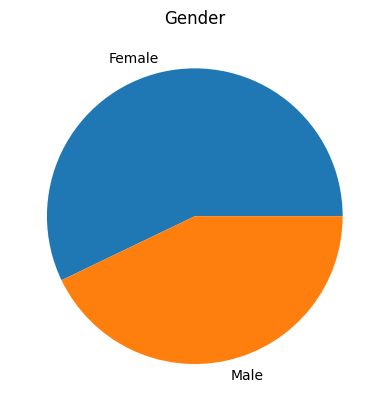

---------

Male      6431
Female    8569
Name: Gender, dtype: int64
---------



In [90]:
for col in binary:
    plt.pie(df[col].value_counts().values, labels=df[col].value_counts().index)
    plt.title(col)
    plt.show()
    print("---------\n")
    print(df[col].value_counts().sort_index(ascending=False))
    print("---------\n")

### Observation
- A fair and balanced distribution can be seen

### Distribution of non binary/countable variables

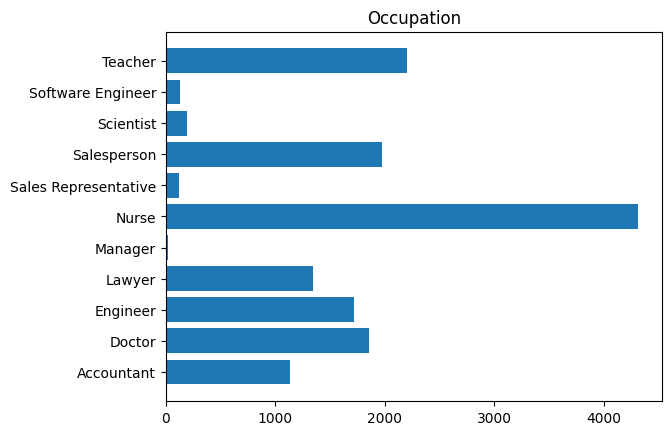

---------

Teacher                 2199
Software Engineer        132
Scientist                193
Salesperson             1974
Sales Representative     115
Nurse                   4316
Manager                   22
Lawyer                  1340
Engineer                1719
Doctor                  1856
Accountant              1134
Name: Occupation, dtype: int64
---------



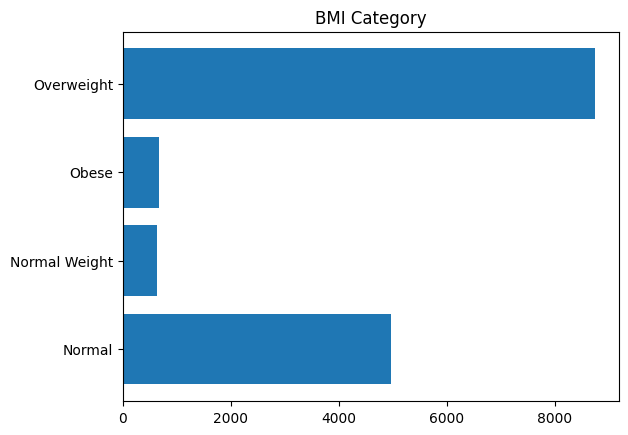

---------

Overweight       8755
Obese             659
Normal Weight     624
Normal           4962
Name: BMI Category, dtype: int64
---------



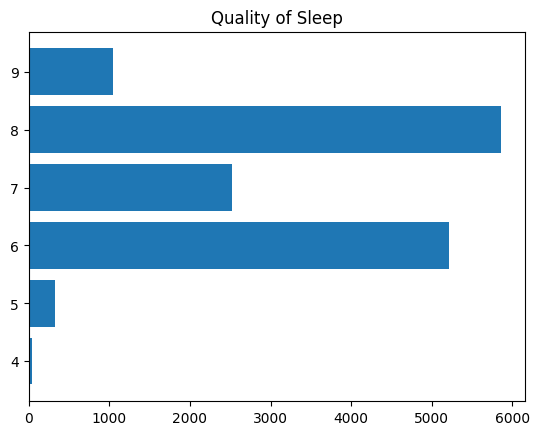

---------

9    1044
8    5858
7    2523
6    5212
5     324
4      39
Name: Quality of Sleep, dtype: int64
---------



In [91]:
for col in countable:
    plt.barh(df[col].value_counts().sort_index().index, df[col].value_counts().sort_index().values)
    plt.title(col)
    plt.show()
    print("---------\n")
    print(df[col].value_counts().sort_index(ascending=False))
    print("---------\n")

### Observation
- Features are mostly imbalanced
    - in `Occupation`, some are very high and some are very low.
    - in `Quality of Sleep`, the range is in 4-9 with a very high majority of 6-8 range.
    - in `BMI`, Obsese can be seen very less, also 'normal' and 'normal weight' are similar so they can be merged.

In [92]:
# replacing unnecessary value

df.replace('Normal Weight', 'Normal', inplace=True)

## Looking into **Numerical variables**

In [93]:
num_col

['Age',
 'Sleep Duration',
 'Physical Activity Level',
 'Stress Level',
 'Heart Rate',
 'Daily Steps',
 'systolic_bp',
 'diastolic_bp']

Information of "Age": 

   index           Age
0  count  15000.000000
1   mean     44.130667
2    std      6.840091
3    min     27.000000
4    25%     40.000000
5    50%     44.000000
6    75%     48.000000
7    max     59.000000

-----------

Information of "Sleep Duration": 

   index  Sleep Duration
0  count    15000.000000
1   mean        6.997327
2    std        0.615187
3    min        5.800000
4    25%        6.500000
5    50%        7.000000
6    75%        7.450000
7    max        8.500000

-----------

Information of "Physical Activity Level": 

   index  Physical Activity Level
0  count             15000.000000
1   mean                59.925000
2    std                16.814374
3    min                30.000000
4    25%                45.000000
5    50%                60.000000
6    75%                75.000000
7    max                90.000000

-----------

Information of "Stress Level": 

   index  Stress Level
0  count  15000.000000
1   mean      5.654800
2    std      1

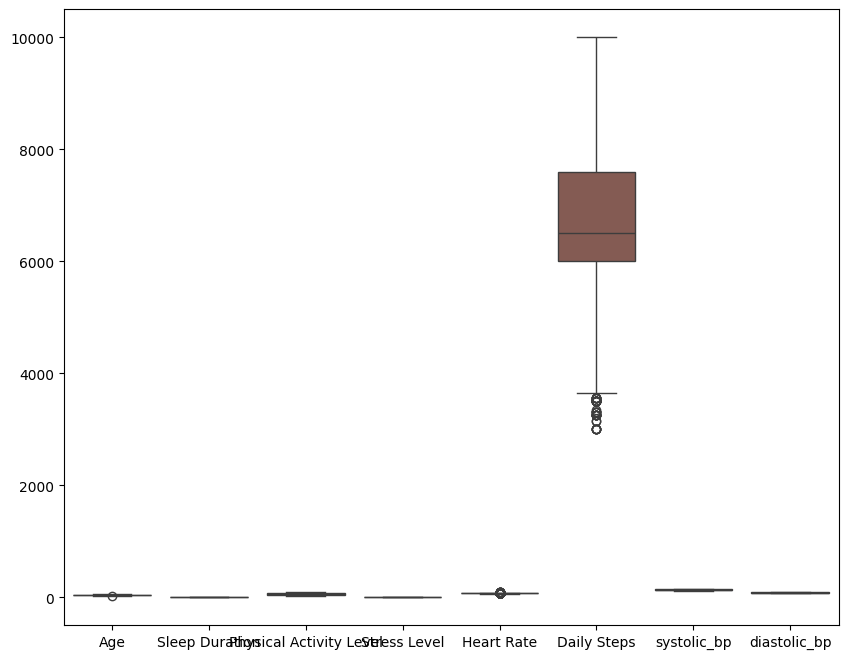

In [94]:
for col in num_col:
    print(f"Information of \"{col}\": \n")
    print(df[col].describe().reset_index())
    print("\n-----------\n")

plt.figure(figsize=(10, 8))
sns.boxplot(df[num_col])
plt.show()

### observation
- `Daily Steps` needs to be standardised as they are too big compared to other features.
- `Daily Steps` has soem outliers too.

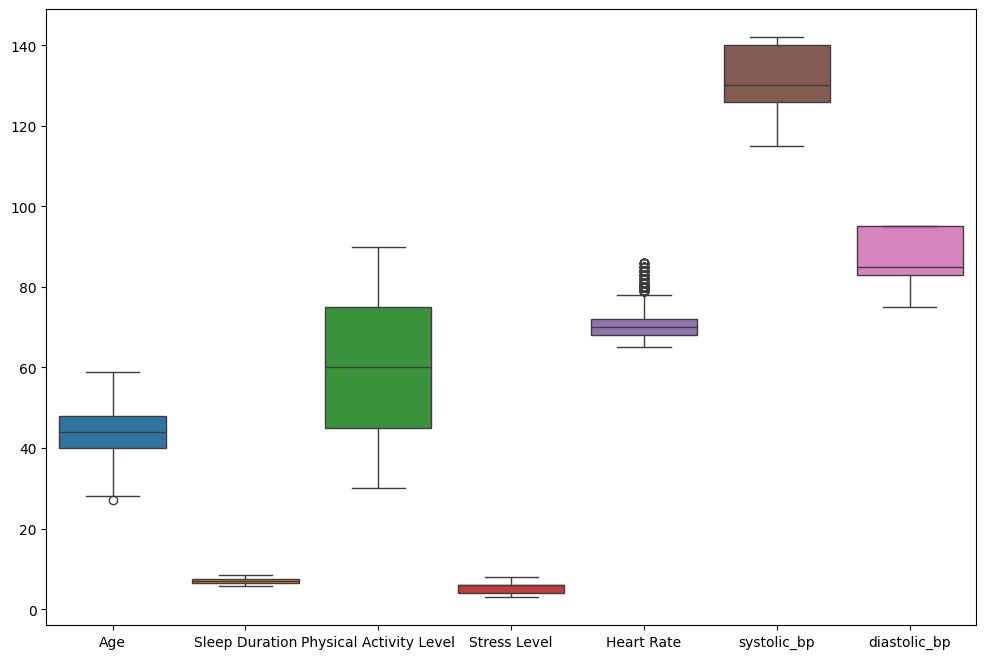

In [95]:
# box plots of others without Daily Steps
num_col_without_steps = [x for x in num_col if x != 'Daily Steps']

plt.figure(figsize=(12, 8))
sns.boxplot(df[num_col_without_steps])
plt.show()

### observation
- all these features are also need to be standardised
- There are some outliers in `Heart rate`

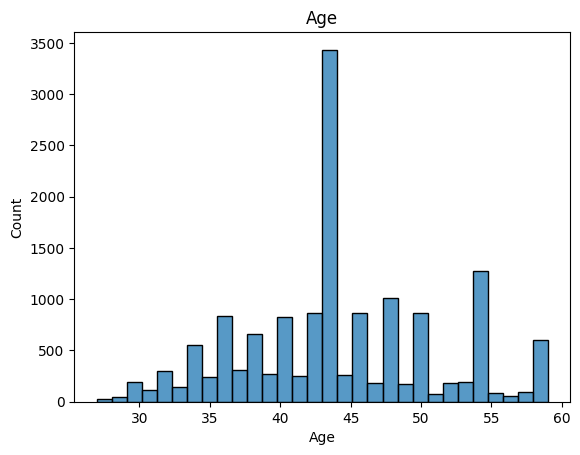

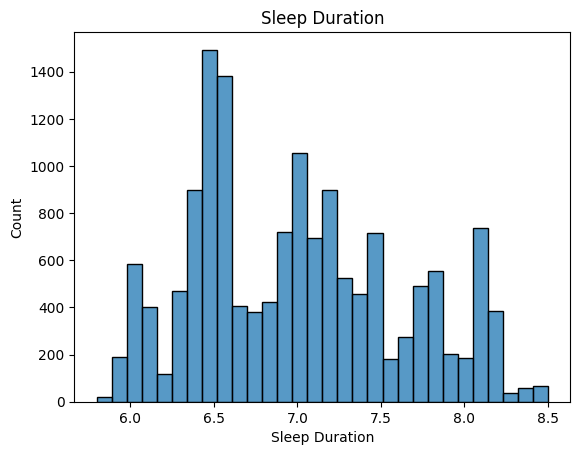

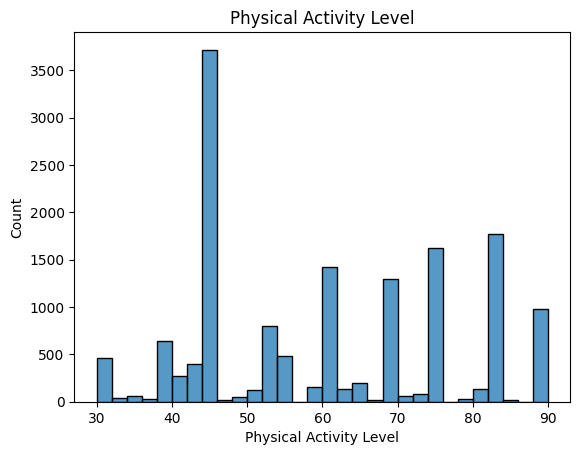

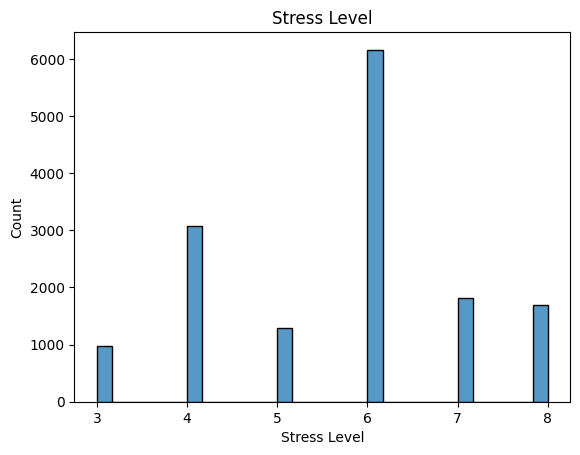

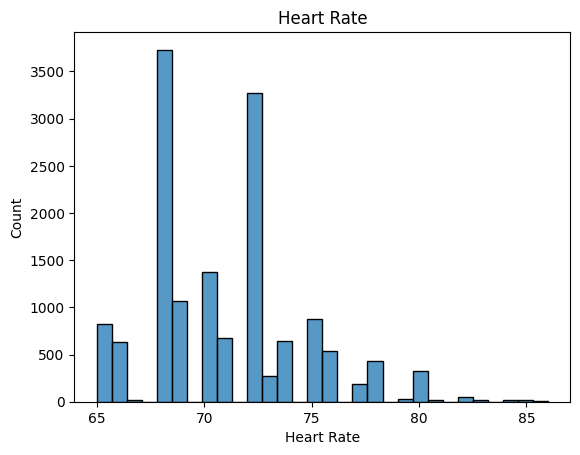

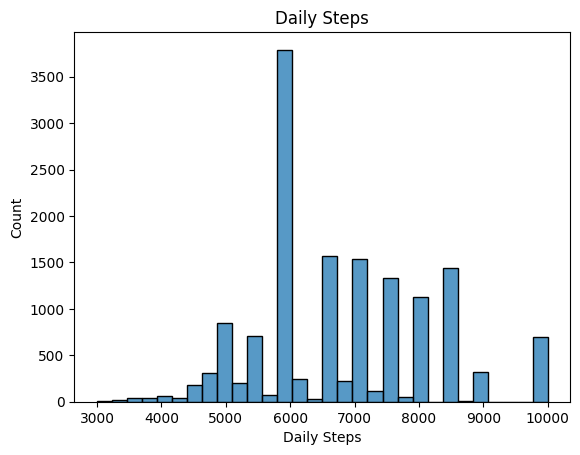

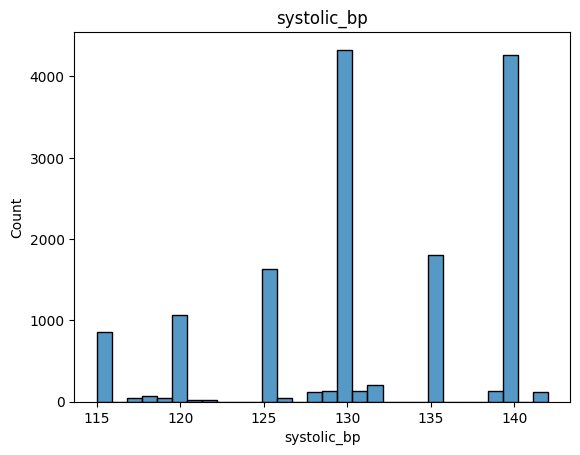

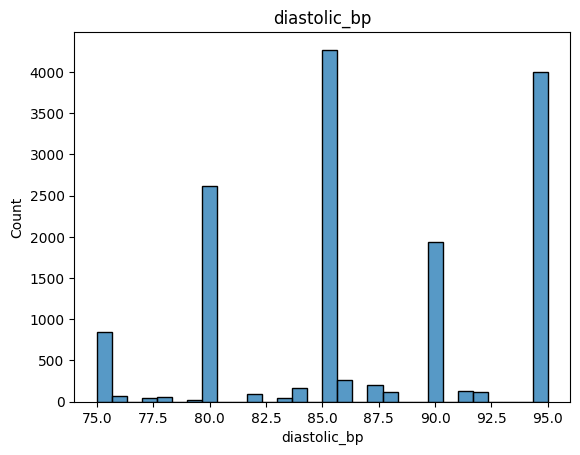

In [96]:
for col in num_col:
    sns.histplot(df[col], bins=30)
    plt.title(col)
    plt.show()

### Observation
- `Age`, `Daily steps`, `systolic_bp` and `distolic_bp` shows almost normal distribution.
- `Stress level` is slightly right skewed which shows most people find themselves in stress.
- `Physcial activity` and `sleep duration` are left skewed.

## Relationship for target and numerical values

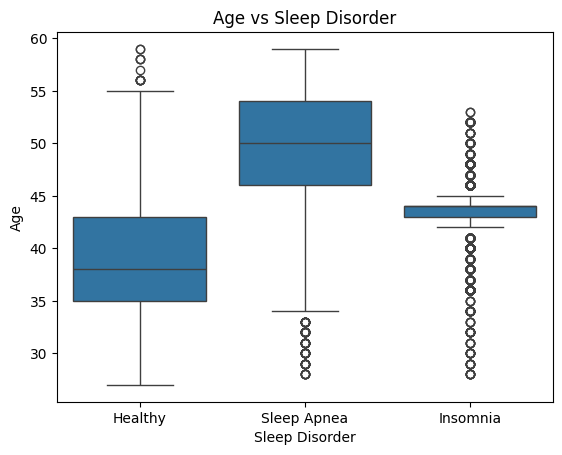

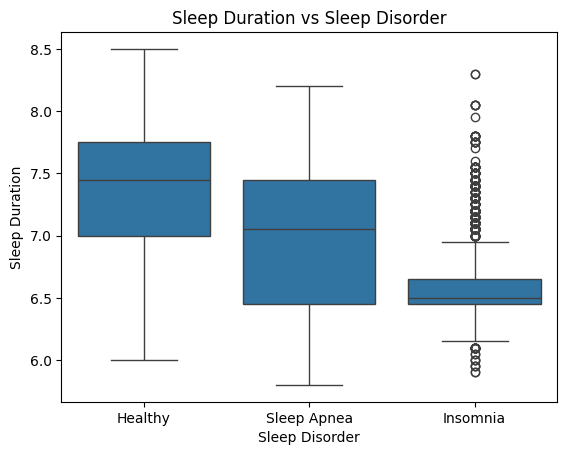

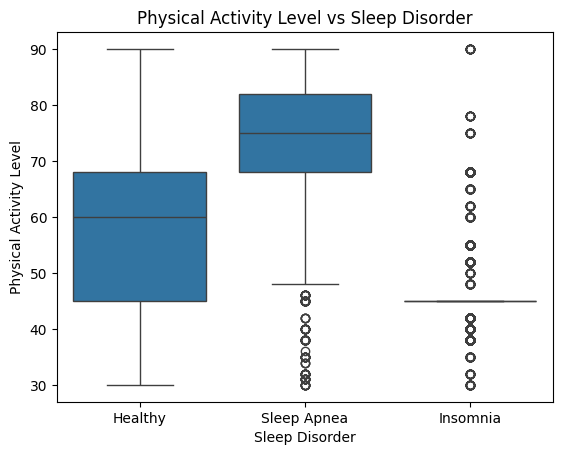

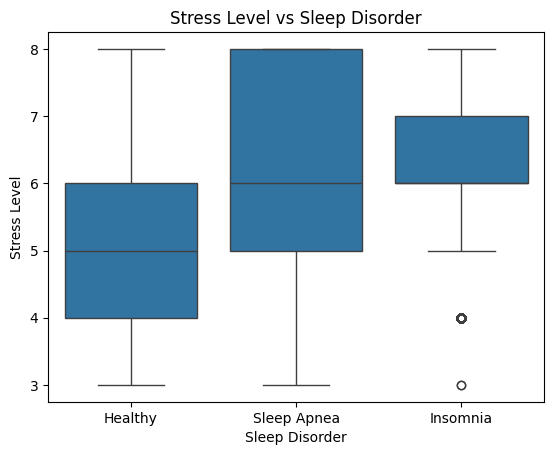

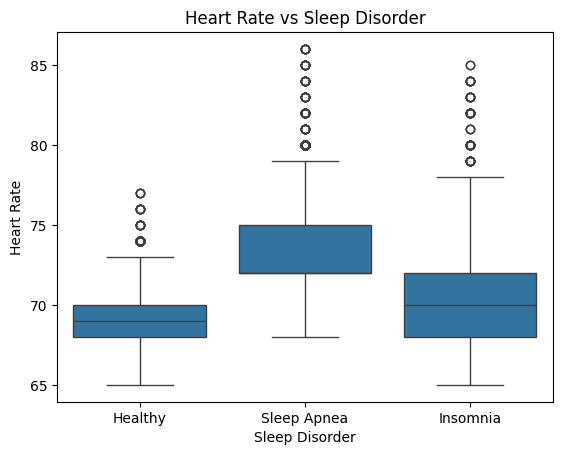

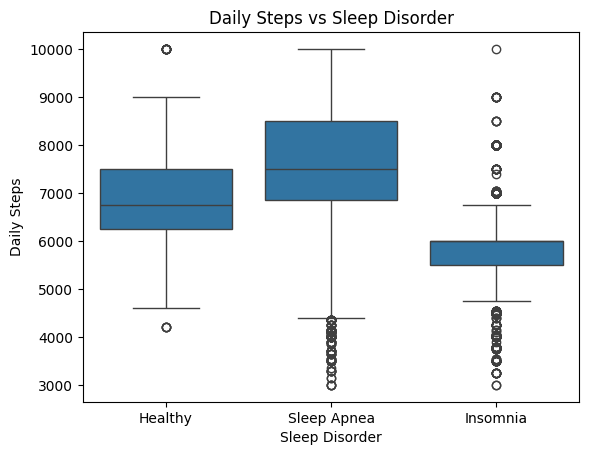

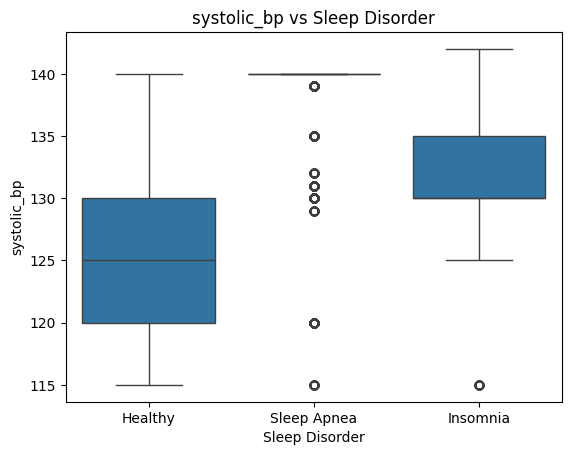

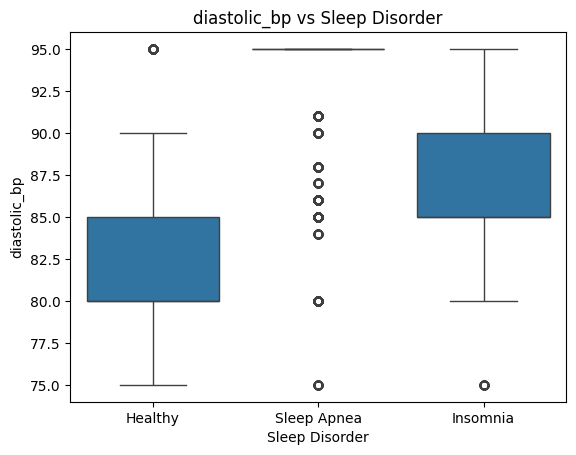

In [97]:
for col in num_col:
    sns.boxplot(
        x=target,
        y=col,
        data=df
    )
    plt.title(f"{col} vs {target}")
    plt.show()

### Observation
- Insomnia has very limited range of age.
- people with high blood pressure Blood pressure are tend to have condition of sleep apnea.
- People with insomnia have a very narrow range of physical activity.
- almost every features have outliers.

## Relationship among numerical columns

<Axes: >

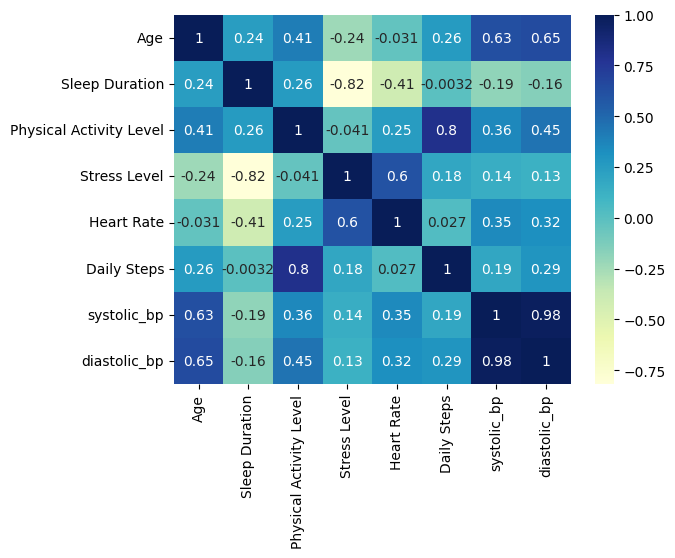

In [98]:
sns.heatmap(df[num_col].corr(), annot=True, cmap='YlGnBu')

### observation
- There's a very strong positive correlation between `systolic_bp` and `diastolic_bp`.
- `Age` and `blood pressure` are having a fair positive correlation.
- `Stress level` and `Sleep duration` shows a strong negative correlation.
- `Daily steps` and `Physical activity level` had a very good positive correlation.
- `Heart rate` and `Stress level` has a good positive correlation.
- Many other features also show a slight or fair enough correlation among them.

## Relationship for target and categorical values

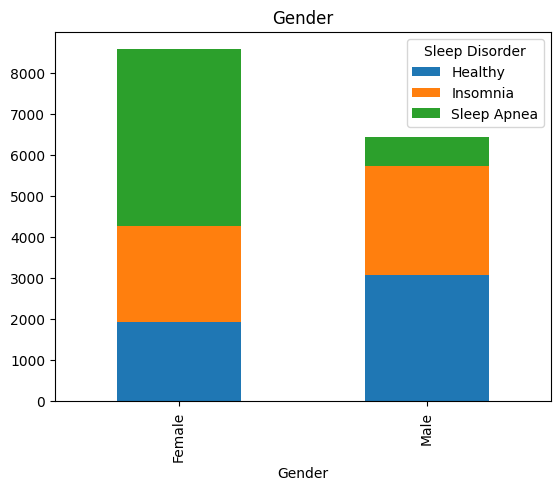

"Female" has 27.34% Insomnia cases and 50.17% Sleep Apnea cases
"Male" has 41.32% Insomnia cases and 10.90% Sleep Apnea cases


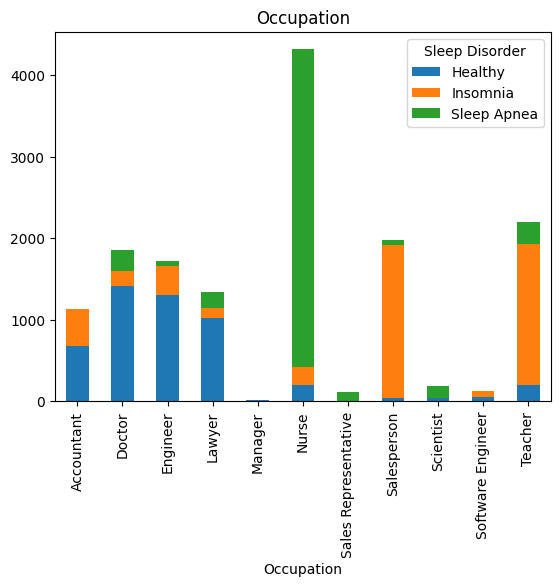

"Accountant" has 39.51% Insomnia cases and 0.00% Sleep Apnea cases
"Doctor" has 9.91% Insomnia cases and 13.95% Sleep Apnea cases
"Engineer" has 20.30% Insomnia cases and 3.61% Sleep Apnea cases
"Lawyer" has 8.96% Insomnia cases and 14.78% Sleep Apnea cases
"Manager" has 0.00% Insomnia cases and 0.00% Sleep Apnea cases
"Nurse" has 5.07% Insomnia cases and 90.13% Sleep Apnea cases
"Sales Representative" has 0.00% Insomnia cases and 100.00% Sleep Apnea cases
"Salesperson" has 94.68% Insomnia cases and 2.94% Sleep Apnea cases
"Scientist" has 0.00% Insomnia cases and 76.68% Sleep Apnea cases
"Software Engineer" has 59.85% Insomnia cases and 0.00% Sleep Apnea cases
"Teacher" has 78.76% Insomnia cases and 12.28% Sleep Apnea cases


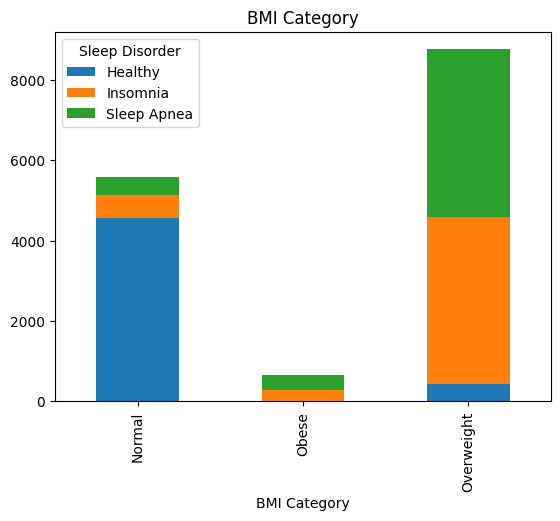

"Normal" has 10.44% Insomnia cases and 7.89% Sleep Apnea cases
"Obese" has 41.73% Insomnia cases and 58.27% Sleep Apnea cases
"Overweight" has 47.31% Insomnia cases and 47.69% Sleep Apnea cases


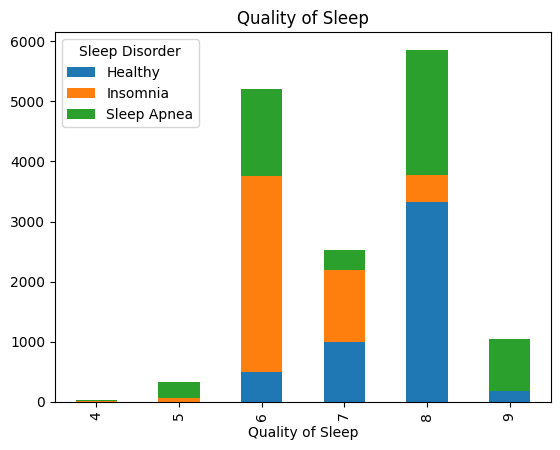

"4" has 28.21% Insomnia cases and 71.79% Sleep Apnea cases
"5" has 21.91% Insomnia cases and 78.09% Sleep Apnea cases
"6" has 62.74% Insomnia cases and 27.82% Sleep Apnea cases
"7" has 47.64% Insomnia cases and 12.76% Sleep Apnea cases
"8" has 7.58% Insomnia cases and 35.66% Sleep Apnea cases
"9" has 0.19% Insomnia cases and 82.18% Sleep Apnea cases


In [99]:
for col in cat_col:
    ct = pd.crosstab(df[col], df[target])
    ct.plot(kind='bar', stacked=True)
    plt.title(col)
    plt.show()
    for i in ct.index:
        total = ct['Healthy'][i] + ct['Insomnia'][i] + ct['Sleep Apnea'][i]
        print(f"\"{i}\" has {ct['Insomnia'][i]/ total * 100:.2f}% Insomnia cases and {ct['Sleep Apnea'][i]/total * 100:.2f}% Sleep Apnea cases")

### Observation
- `Males` are having higher proportion of Healthy sleep compared to feamles.
- Occupations like `Nurse`, `sales`, `Scientists`, `teachers` have a very negligible amount of health sleep.
- The self evaluated `sleep quality` doesn't seem true as people with higher sleep quality also has a good amount of sleep disorders.
- People with `Normal` BMI have a good proportion of healthy sleep.